In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

In [2]:
df = pd.read_csv('freq_exposition_achat_merged2.csv')

## Analysis

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35388 non-null  int64  
 1   customer_id        35388 non-null  object 
 2   sales              35388 non-null  float64
 3   quantity           35388 non-null  float64
 4   Add to cart        35388 non-null  float64
 5   Order              35388 non-null  float64
 6   Product Page View  35388 non-null  float64
 7   freq_react         35388 non-null  float64
 8   device_id          35388 non-null  object 
 9   freq_tv            35388 non-null  int64  
 10  dsp_id             35388 non-null  object 
 11  freq_prog          35388 non-null  int64  
 12  freq_totale        35388 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 3.5+ MB
None


In [4]:
display(df.head(10))

,Unnamed: 0,customer_id,sales,quantity,Add to cart,Order,Product Page View,freq_react,device_id,freq_tv,dsp_id,freq_prog,freq_totale
0,0,re00CKn2yOaub2t96K,46.67,1.0,1.0,1.0,6.0,8.0,ctvOeSltoMMJ,2,dspjS8smJIRHKBhwamdxBzZzZh1CJi,1,3
1,1,re00aRkgItYQpIBs4v,78.98,1.0,2.0,1.0,3.0,6.0,ctv4YVSu6w48,1,dspDxWVaZM9Z4zFgpWlqyCe9YFZ6xk,1,2
2,2,re00fY6oH5hwDeHicN,172.97,3.0,4.0,3.0,16.0,23.0,ctvWuzHNZ43W,1,dspcvhk8ZfZ6nrN3eQMm2Q6pbbM2Gh,1,2
3,3,re00itkOXBMIgSS7yM,20.49,1.0,1.0,1.0,2.0,4.0,ctvz0yKxiDe6,1,dspcBhtHgoJg7gJTDZXbz8C8K2ysrS,2,3
4,4,re00qEtvplbarZyd4l,0.00,0.0,0.0,0.0,1.0,1.0,ctvVVbtu2MuP,4,dspLjyKPkZ7Ugubsr2p30xoXDaQIv8,1,5
5,5,re010o5W6JWsQq2Nke,0.00,0.0,2.0,0.0,12.0,14.0,ctv8U69yieBw,4,dsp2hRg7K8ya8rnwDnXjQ3tJkf8INo,1,5
6,6,re012Muoq9mKQlWPfh,175.97,2.0,2.0,2.0,9.0,13.0,ctvM7UVrUMbm,1,dspNAGOKX0IiVJsUSpBSmytdOoCVPV,1,2
7,7,re013Kr8KhunDrCoAe,418.32,9.0,5.0,9.0,4.0,18.0,ctvvrCfzbf3q,10,dspToKbpzMZQbwp5mEmDXqDl3Gs8Dd,2,12
8,8,re015otsriXJHU4ruM,72.98,2.0,2.0,2.0,0.0,4.0,ctv06s7A69aP,2,dspTssEGLDh1n9UtIUej1acLydfk1o,3,5
9,9,re01LvhApXxFB5SJQK,0.00,0.0,0.0,0.0,2.0,2.0,ctvdNmSSF45S,1,dspEN88px300feFUyQYtaKIB6sJ0ES,3,4


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
print(df.dtypes)

customer_id           object
sales                float64
quantity             float64
Add to cart          float64
Order                float64
Product Page View    float64
freq_react           float64
device_id             object
freq_tv                int64
dsp_id                object
freq_prog              int64
freq_totale            int64
dtype: object


In [7]:
df['freq_tv'].describe()

count    35388.000000
mean         3.401294
std          5.591288
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        162.000000
Name: freq_tv, dtype: float64

In [8]:
df['freq_prog'].describe()

count    35388.000000
mean         4.528004
std          7.100519
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        135.000000
Name: freq_prog, dtype: float64

In [9]:
df['freq_totale'].describe()

count    35388.000000
mean         7.929298
std          9.016122
min          2.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        163.000000
Name: freq_totale, dtype: float64

# Cap Curve for different advertising 

## Plotting Cap Curve

#### Capping Value analysis of "freq_totale"

In [10]:
# Define the bins and corresponding labels
bins = [1, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["1-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

In [11]:
# Create the binned column
df['freq_totale_bins'] = pd.cut(df['freq_totale'], bins=bins, labels=labels, right=False)

freq_totale_bins
1-5        7.776796
5-10       7.517707
10-15      7.775804
15-20      8.131683
20-30      8.128134
30-40      8.666151
40-50      5.658537
50-100     7.805785
100-200    3.909091
Name: freq_react, dtype: float64


C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\1851587586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totale_avg_reactions_per_bin = df.groupby('freq_totale_bins')['freq_react'].mean()
C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\1851587586.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totale_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_totale_bins')['freq_react'].count().values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


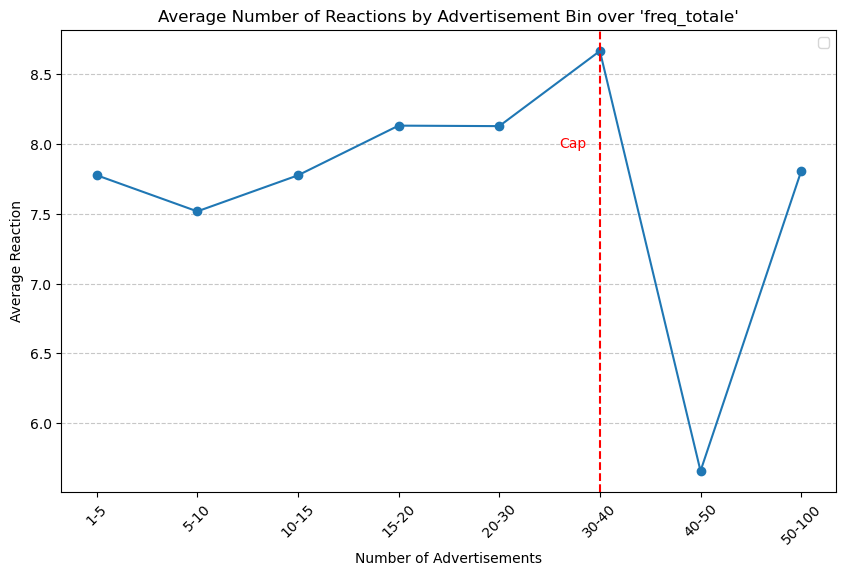

In [12]:
# Calculate the average reactions per bin
totale_avg_reactions_per_bin = df.groupby('freq_totale_bins')['freq_react'].mean()
totale_avg_reactions_per_bin_df = totale_avg_reactions_per_bin.reset_index()
totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

# Add the sample size (number of people per bin)
totale_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_totale_bins')['freq_react'].count().values

# Filter out bins with very few observations. This is based on Empirical Approach.
totale_min_sample_size = 100
totale_avg_reactions_per_bin_df = totale_avg_reactions_per_bin_df[totale_avg_reactions_per_bin_df['Sample Size'] >= totale_min_sample_size]
print(totale_avg_reactions_per_bin)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(totale_avg_reactions_per_bin_df['Frequency Bin'], totale_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.axvline(x=5, color='r', linestyle='--')
plt.text(4.6, 8, f'Cap', color='r', va='center', ha='left')
plt.title("Average Number of Reactions by Advertisement Bin over 'freq_totale'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.legend()
plt.show()

#### Capping Value analysis of "freq_tv"

In [13]:
# Create the binned column
df['freq_tv_bins'] = pd.cut(df['freq_tv'], bins=bins, labels=labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\2488056784.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tv_avg_reactions_per_bin = df.groupby('freq_tv_bins')['freq_react'].mean()
C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\2488056784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tv_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_tv_bins')['freq_react'].count().values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


freq_tv_bins
1-5        7.870197
5-10       7.134318
10-15      7.287440
15-20      7.224490
20-30      7.197279
30-40      7.152000
40-50      9.516129
50-100     8.466667
100-200    4.200000
Name: freq_react, dtype: float64


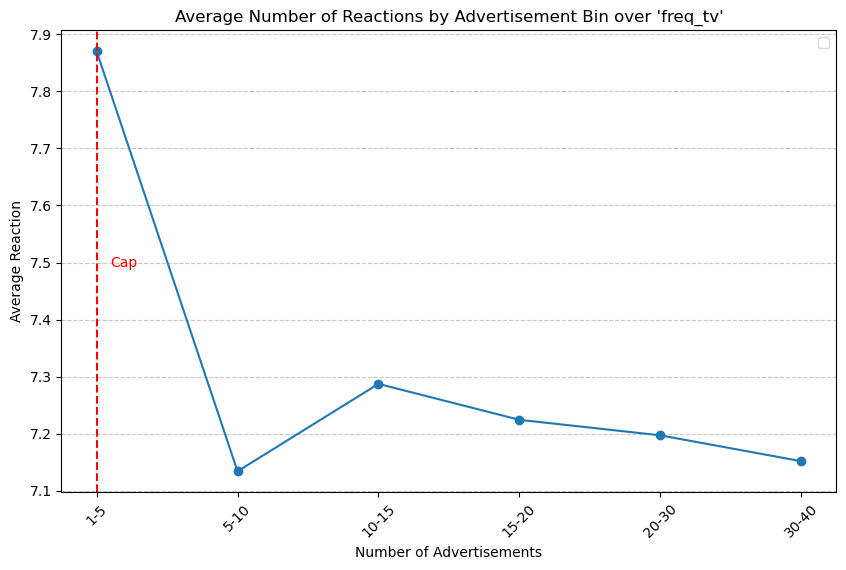

In [14]:
# Calculate the average reactions per bin
tv_avg_reactions_per_bin = df.groupby('freq_tv_bins')['freq_react'].mean()
tv_avg_reactions_per_bin_df = tv_avg_reactions_per_bin.reset_index()
tv_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

# Add the sample size (number of people per bin)
tv_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_tv_bins')['freq_react'].count().values

# Filter out bins with very few observations. This is based on Empirical Approach.
tv_min_sample_size = 100
tv_avg_reactions_per_bin_df = tv_avg_reactions_per_bin_df[tv_avg_reactions_per_bin_df['Sample Size'] >= tv_min_sample_size]
print(tv_avg_reactions_per_bin)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tv_avg_reactions_per_bin_df['Frequency Bin'], tv_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.axvline(x=0, color='r', linestyle='--')
plt.text(0.1, 7.5, f'Cap', color='r', va='center', ha='left')
plt.title("Average Number of Reactions by Advertisement Bin over 'freq_tv'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.legend()
plt.show()

#### Capping Value analysis of "freq_prog"

In [15]:
# Create the binned column
df['freq_prog_bins'] = pd.cut(df['freq_prog'], bins=bins, labels=labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\2003907085.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prog_avg_reactions_per_bin = df.groupby('freq_prog_bins')['freq_react'].mean()
C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\2003907085.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prog_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_prog_bins')['freq_react'].count().values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


freq_prog_bins
1-5        7.586419
5-10       7.993438
10-15      8.369817
15-20      9.208413
20-30      8.129568
30-40      8.294479
40-50      6.155039
50-100     6.669811
100-200    4.200000
Name: freq_react, dtype: float64


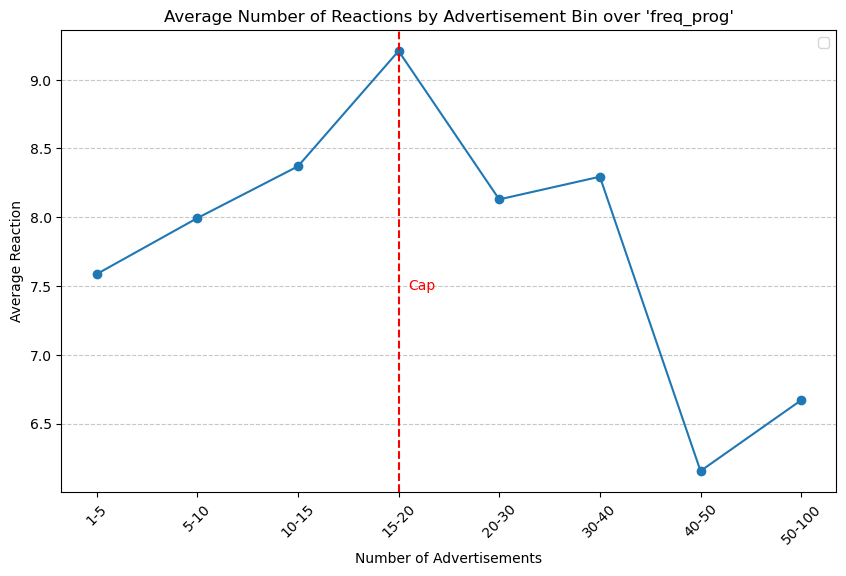

In [16]:
# Calculate the average reactions per bin
prog_avg_reactions_per_bin = df.groupby('freq_prog_bins')['freq_react'].mean()
prog_avg_reactions_per_bin_df = prog_avg_reactions_per_bin.reset_index()
prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Reactions']

# Add the sample size (number of people per bin)
prog_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_prog_bins')['freq_react'].count().values

# Filter out bins with very few observations. This is based on Empirical Approach.
prog_min_sample_size = 100
prog_avg_reactions_per_bin_df = prog_avg_reactions_per_bin_df[prog_avg_reactions_per_bin_df['Sample Size'] >= prog_min_sample_size]
print(prog_avg_reactions_per_bin)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(prog_avg_reactions_per_bin_df['Frequency Bin'], prog_avg_reactions_per_bin_df['Average Reactions'], marker='o', linestyle='-')
plt.axvline(x=3, color='r', linestyle='--')
plt.text(3.1, 7.5, f'Cap', color='r', va='center', ha='left')
plt.title("Average Number of Reactions by Advertisement Bin over 'freq_prog'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.legend()
plt.show()

## Plotting Weighted Cap Curve

In [17]:
# Define weights
weight_page_view = 1
weight_add_to_cart = 2
weight_order = 3

# Normalize each attribute to the range [0, 1]
df['Product Page View Norm'] = df['Product Page View'] / df['Product Page View'].max()
df['Add to cart Norm'] = df['Add to cart'] / df['Add to cart'].max()
df['Order Norm'] = df['Order'] / df['Order'].max()

# Calculate the weighted reaction using normalized values
df['weighted_reaction'] = (
    df['Product Page View Norm'] * weight_page_view +
    df['Add to cart Norm'] * weight_add_to_cart +
    df['Order Norm'] * weight_order
)

In [18]:
# Reuse existing bins for advertisement frequency
bins = [1, 5, 10, 15, 20, 30, 40, 50, 100, 200]
labels = ["1-5", "5-10", "10-15", "15-20", "20-30", "30-40", "40-50", "50-100", "100-200"]

#### Weighted Capping Value analysis of "freq_totale"

In [19]:
# Bin the freq_total column
df['freq_bins_weighted_totale'] = pd.cut(df['freq_totale'], bins=bins, labels=labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\1970232752.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totale_weighted_totale_avg_reactions_per_bin = df.groupby('freq_bins_weighted_totale')['weighted_reaction'].mean()
C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\1970232752.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totale_weighted_totale_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_bins_weighted_totale')['weighted_reaction'].count().values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is ca

freq_bins_weighted_totale
1-5        0.151734
5-10       0.140742
10-15      0.150095
15-20      0.155928
20-30      0.153357
30-40      0.165604
40-50      0.092717
50-100     0.101919
100-200    0.034120
Name: weighted_reaction, dtype: float64


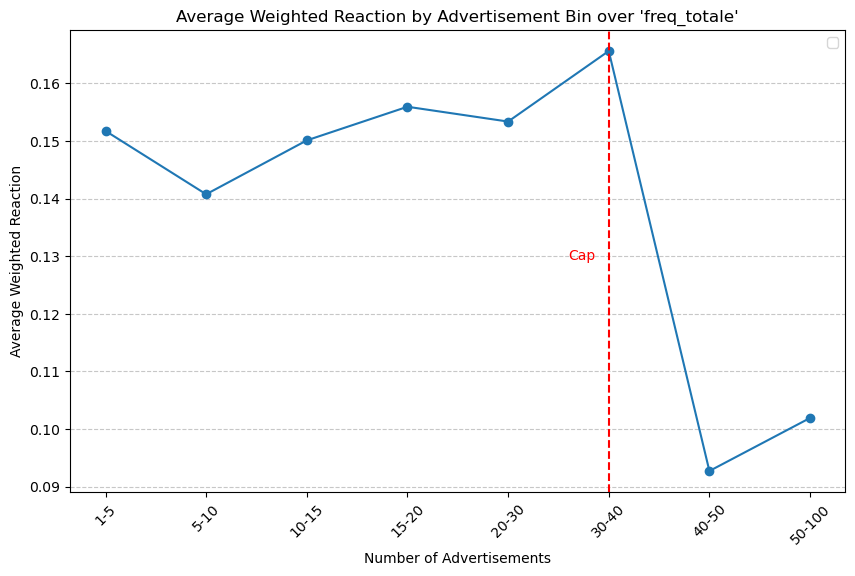

In [20]:
# Calculate the average reactions per bin
totale_weighted_totale_avg_reactions_per_bin = df.groupby('freq_bins_weighted_totale')['weighted_reaction'].mean()
totale_weighted_totale_avg_reactions_per_bin_df = totale_weighted_totale_avg_reactions_per_bin.reset_index()
totale_weighted_totale_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Weighted Reaction']

# Add the sample size (number of people per bin)
totale_weighted_totale_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_bins_weighted_totale')['weighted_reaction'].count().values

# Filter out bins with very few observations. This is based on Empirical Approach.
totale_totale_min_sample_size = 100
totale_weighted_totale_avg_reactions_per_bin_df = totale_weighted_totale_avg_reactions_per_bin_df[totale_weighted_totale_avg_reactions_per_bin_df['Sample Size'] >= totale_totale_min_sample_size]

print(totale_weighted_totale_avg_reactions_per_bin)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(totale_weighted_totale_avg_reactions_per_bin_df['Frequency Bin'], totale_weighted_totale_avg_reactions_per_bin_df['Average Weighted Reaction'], marker='o', linestyle='-')
plt.axvline(x=5, color='r', linestyle='--')
plt.text(4.6, 0.13, f'Cap', color='r', va='center', ha='left')
plt.title("Average Weighted Reaction by Advertisement Bin over 'freq_totale'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.legend()
plt.show()

#### Weighted Capping Value analysis of "freq_tv"

In [21]:
# Bin the freq_total column
df['freq_bins_weighted_tv'] = pd.cut(df['freq_tv'], bins=bins, labels=labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\3082022671.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tv_weighted_tv_avg_reactions_per_bin = df.groupby('freq_bins_weighted_tv')['weighted_reaction'].mean()
C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\3082022671.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tv_weighted_tv_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_bins_weighted_tv')['weighted_reaction'].count().values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


freq_bins_weighted_tv
1-5        0.150297
5-10       0.140159
10-15      0.141546
15-20      0.128120
20-30      0.146991
30-40      0.138437
40-50      0.173050
50-100     0.127494
100-200    0.043255
Name: weighted_reaction, dtype: float64


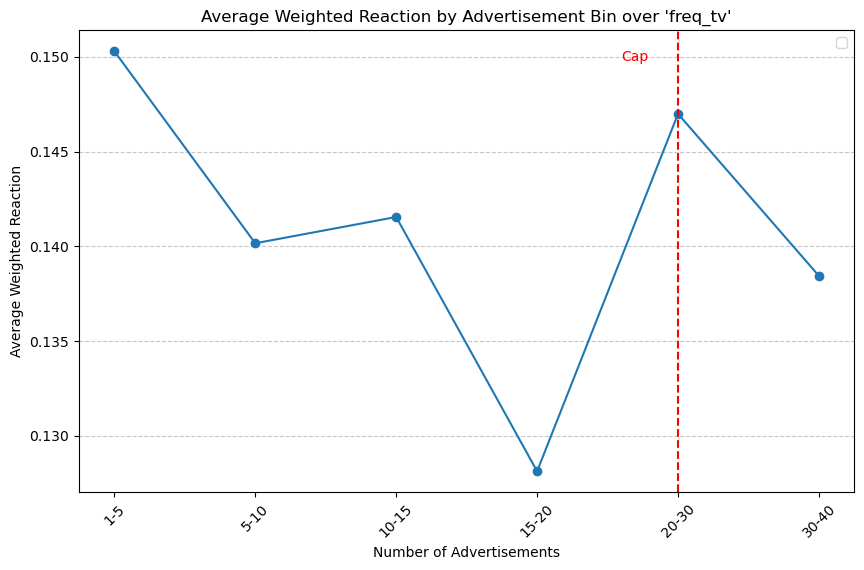

In [22]:
# Calculate the average reactions per bin
tv_weighted_tv_avg_reactions_per_bin = df.groupby('freq_bins_weighted_tv')['weighted_reaction'].mean()
tv_weighted_tv_avg_reactions_per_bin_df = tv_weighted_tv_avg_reactions_per_bin.reset_index()
tv_weighted_tv_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Weighted Reaction']

# Add the sample size (number of people per bin)
tv_weighted_tv_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_bins_weighted_tv')['weighted_reaction'].count().values

# Filter out bins with very few observations. This is based on Empirical Approach.
tv_min_sample_size = 100
tv_weighted_tv_avg_reactions_per_bin_df = tv_weighted_tv_avg_reactions_per_bin_df[tv_weighted_tv_avg_reactions_per_bin_df['Sample Size'] >= tv_min_sample_size]

print(tv_weighted_tv_avg_reactions_per_bin)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tv_weighted_tv_avg_reactions_per_bin_df['Frequency Bin'], tv_weighted_tv_avg_reactions_per_bin_df['Average Weighted Reaction'], marker='o', linestyle='-')
plt.axvline(x=4, color='r', linestyle='--')
plt.text(3.6, 0.15, f'Cap', color='r', va='center', ha='left')
plt.title("Average Weighted Reaction by Advertisement Bin over 'freq_tv'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.legend()
plt.show()

#### Weighted Capping Value analysis of "freq_prog"

In [23]:
# Bin the freq_total column
df['freq_bins_weighted_prog'] = pd.cut(df['freq_prog'], bins=bins, labels=labels, right=False)

C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\2063026075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prog_weighted_prog_avg_reactions_per_bin = df.groupby('freq_bins_weighted_prog')['weighted_reaction'].mean()
C:\Users\lenna\AppData\Local\Temp\ipykernel_51700\2063026075.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prog_weighted_prog_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_bins_weighted_prog')['weighted_reaction'].count().values
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no

freq_bins_weighted_prog
1-5        0.147161
5-10       0.147649
10-15      0.160823
15-20      0.169180
20-30      0.153137
30-40      0.143502
40-50      0.095166
50-100     0.068856
100-200    0.031224
Name: weighted_reaction, dtype: float64


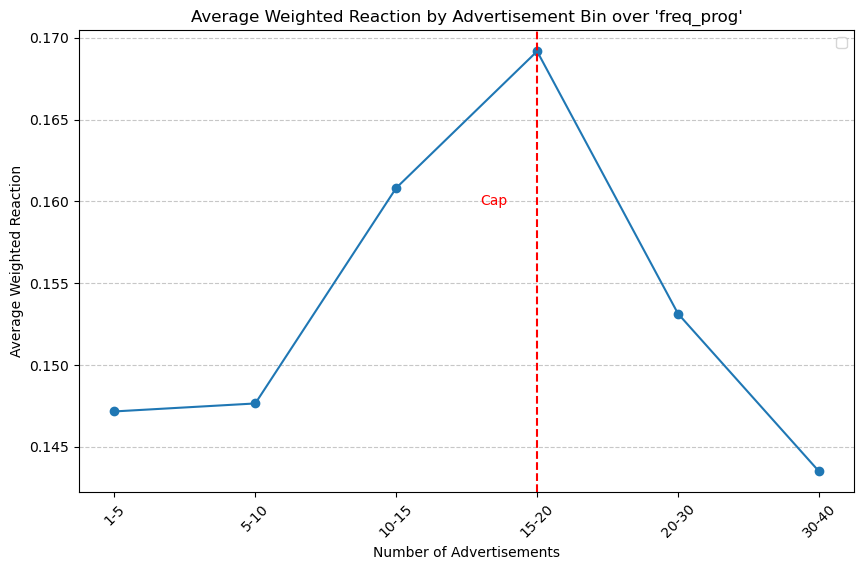

In [24]:
# Calculate the average reactions per bin
prog_weighted_prog_avg_reactions_per_bin = df.groupby('freq_bins_weighted_prog')['weighted_reaction'].mean()
prog_weighted_prog_avg_reactions_per_bin_df = prog_weighted_prog_avg_reactions_per_bin.reset_index()
prog_weighted_prog_avg_reactions_per_bin_df.columns = ['Frequency Bin', 'Average Weighted Reaction']

# Add the sample size (number of people per bin)
prog_weighted_prog_avg_reactions_per_bin_df['Sample Size'] = df.groupby('freq_bins_weighted_prog')['weighted_reaction'].count().values

# Filter out bins with very few observations. This is based on Empirical Approach.
prog_min_sample_size = 200
prog_weighted_prog_avg_reactions_per_bin_df = prog_weighted_prog_avg_reactions_per_bin_df[prog_weighted_prog_avg_reactions_per_bin_df['Sample Size'] >= prog_min_sample_size]

print(prog_weighted_prog_avg_reactions_per_bin)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(prog_weighted_prog_avg_reactions_per_bin_df['Frequency Bin'], prog_weighted_prog_avg_reactions_per_bin_df['Average Weighted Reaction'], marker='o', linestyle='-')
plt.axvline(x=3, color='r', linestyle='--')
plt.text(2.6, 0.16, f'Cap', color='r', va='center', ha='left')
plt.title("Average Weighted Reaction by Advertisement Bin over 'freq_prog'")
plt.xlabel("Number of Advertisements")
plt.ylabel("Average Weighted Reaction")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.legend()
plt.show()